In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import BoxLeastSquares
import scipy.signal
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from lightkurve import search_lightcurve
import courseworkb
import importlib

# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)


<module 'courseworkb' from '/home/olivermcevoy/AstroCourseworkB/courseworkb.py'>

In [2]:
target =  'Kepler-11'
kepler_dataframe, stellar_data = courseworkb.fetch_kepler_data_and_stellar_info_normalise_entire_curve(target,'medfilt')


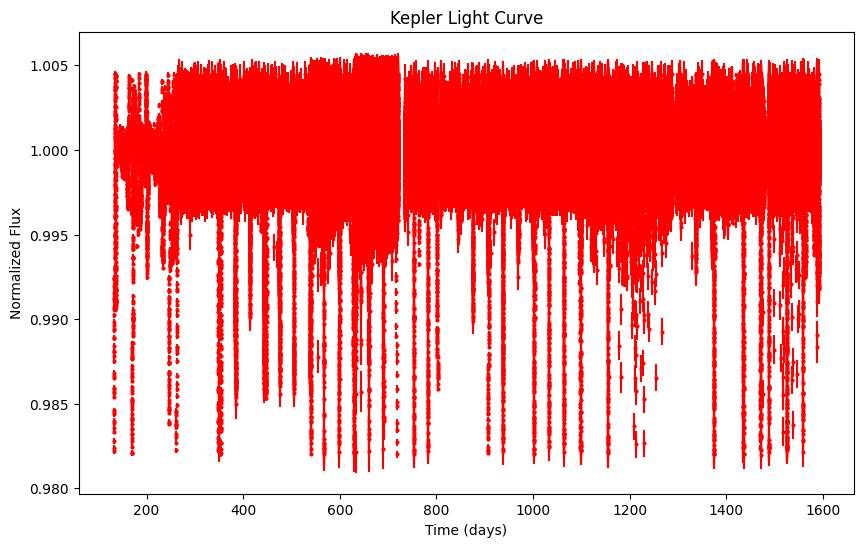

In [3]:
courseworkb.plot_light_curve(kepler_dataframe['time'], kepler_dataframe['flux'], kepler_dataframe['error'])

Running Lomb-Scargle Periodogram Analysis...


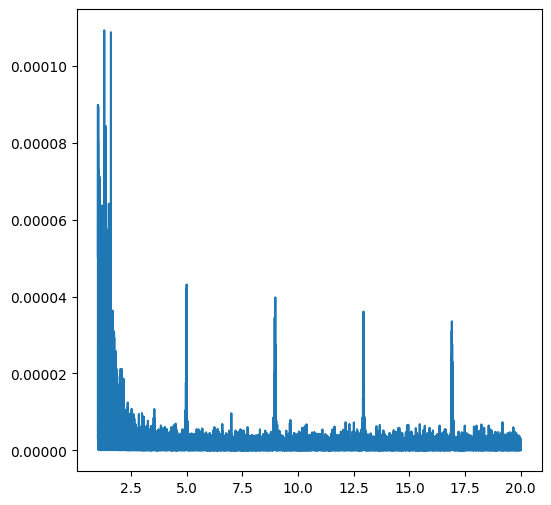

computing second periodogram
Gradient Threshold: 6.23e-08, Second Derivative Threshold: 8.34e-06


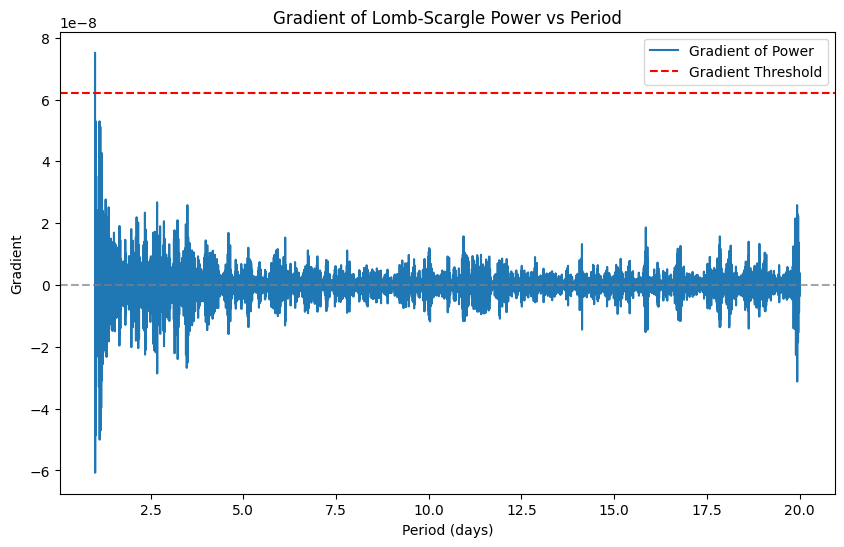

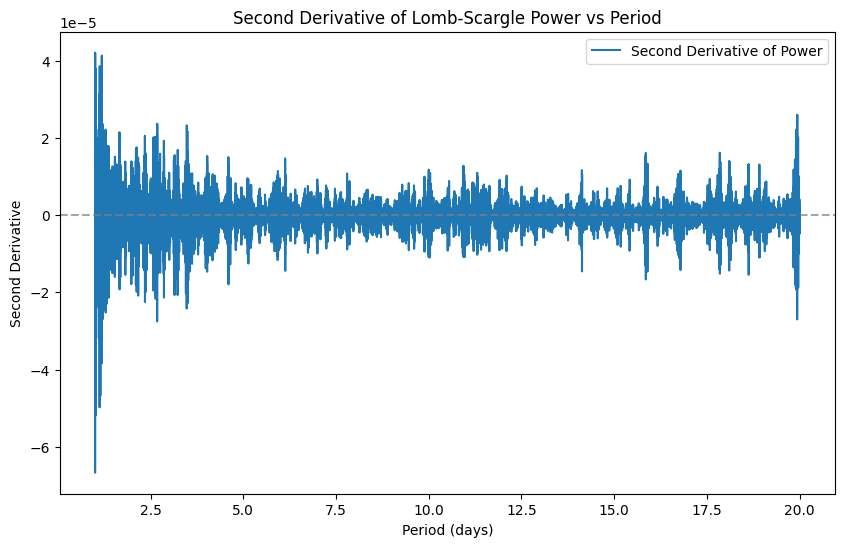

Excluding peaks before period = 1.01 days
Lomb-Scargle Periodogram analysis done


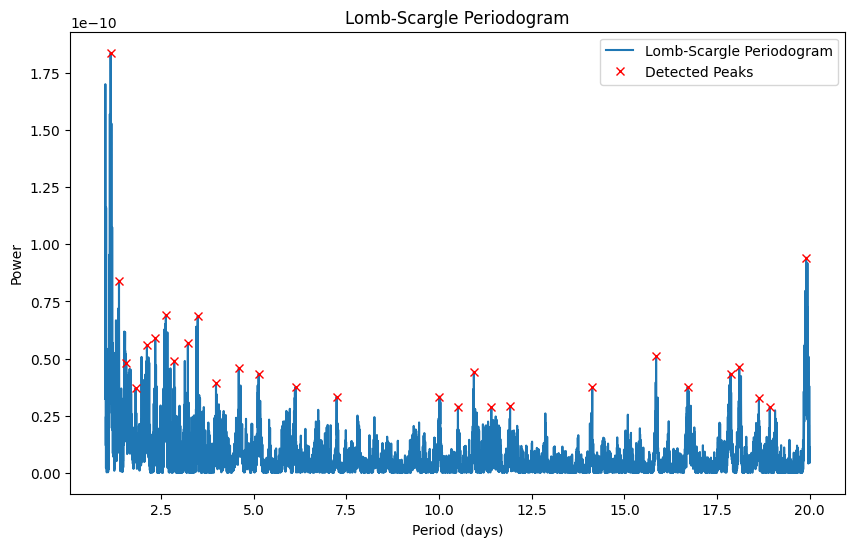

Running Lomb-Scargle Periodogram Analysis...


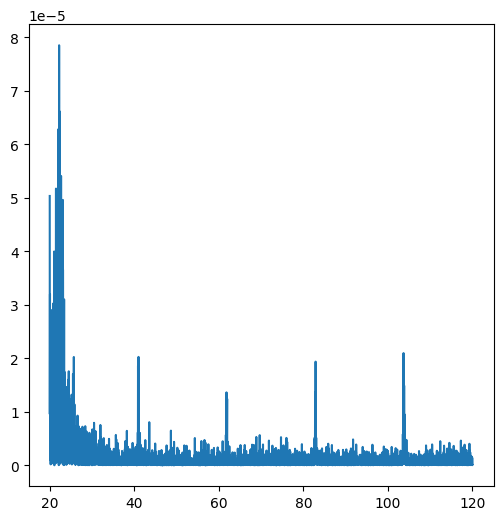

computing second periodogram
Gradient Threshold: 2.03e-11, Second Derivative Threshold: 1.40e-07


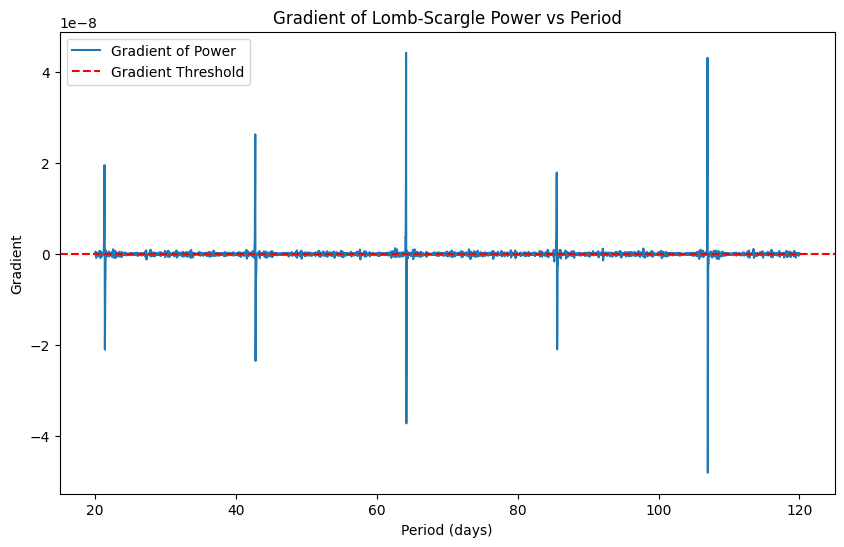

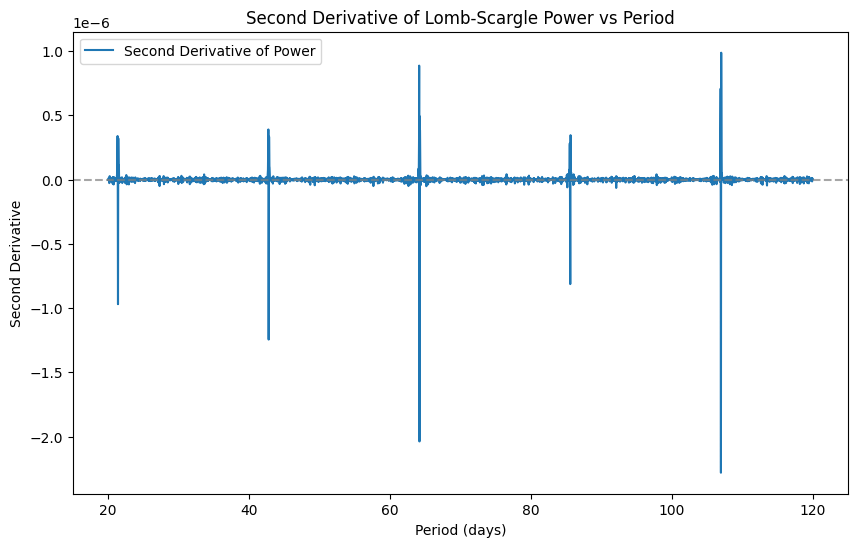

Excluding peaks before period = 20.26 days
Lomb-Scargle Periodogram analysis done


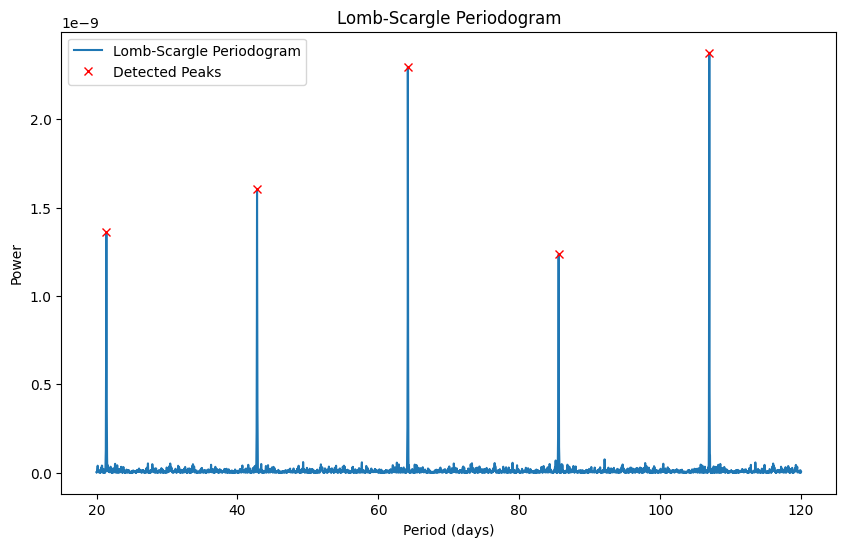

In [4]:
period_range_zoom =(1,20)
peaks_of_lightcurve_zoom = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=50000, period_range=period_range_zoom)

period_range_regular = (0,120)
peaks_of_lightcurve = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=5000, period_range=period_range_regular)

# add 2 sets of peak to the same array
peaks_of_lightcurve = np.concatenate((peaks_of_lightcurve_zoom,peaks_of_lightcurve),axis=0)

In [5]:
print(len(peaks_of_lightcurve))
peaks_of_lightcurve_filt = courseworkb.remove_exact_duplicates(peaks_of_lightcurve,0.05, False)
print(len(peaks_of_lightcurve_filt))


results_list_no_filter = courseworkb.analyze_peaks_with_bls(
      kepler_dataframe["time"].values,
      kepler_dataframe["flux"].values,
      kepler_dataframe["error"].values,
      peaks_of_lightcurve_filt,
      5000
)





33
Adding period 1.145 days to the unique results.
Adding period 1.371 days to the unique results.
Adding period 1.566 days to the unique results.
Adding period 1.817 days to the unique results.
Adding period 2.123 days to the unique results.
Adding period 2.348 days to the unique results.
Adding period 2.634 days to the unique results.
Adding period 2.860 days to the unique results.
Adding period 3.228 days to the unique results.
Adding period 3.493 days to the unique results.
Adding period 3.986 days to the unique results.
Adding period 4.600 days to the unique results.
Adding period 5.136 days to the unique results.
Adding period 6.130 days to the unique results.
Adding period 7.239 days to the unique results.
Adding period 10.013 days to the unique results.
Adding period 10.940 days to the unique results.
Adding period 11.917 days to the unique results.
Adding period 14.133 days to the unique results.
Adding period 15.855 days to the unique results.
Adding period 16.705 days to the

In [12]:


print(f"Number of peaks found: {len(results_list_no_filter)}")

results_list = courseworkb.remove_duplicate_periods(results_list_no_filter,0.1,0.5, 0.75)

print(f"Number of peaks found after removing duplicates: {len(results_list)}")


Number of peaks found: 0
Number of peaks found after removing duplicates: 0


IndexError: list index out of range

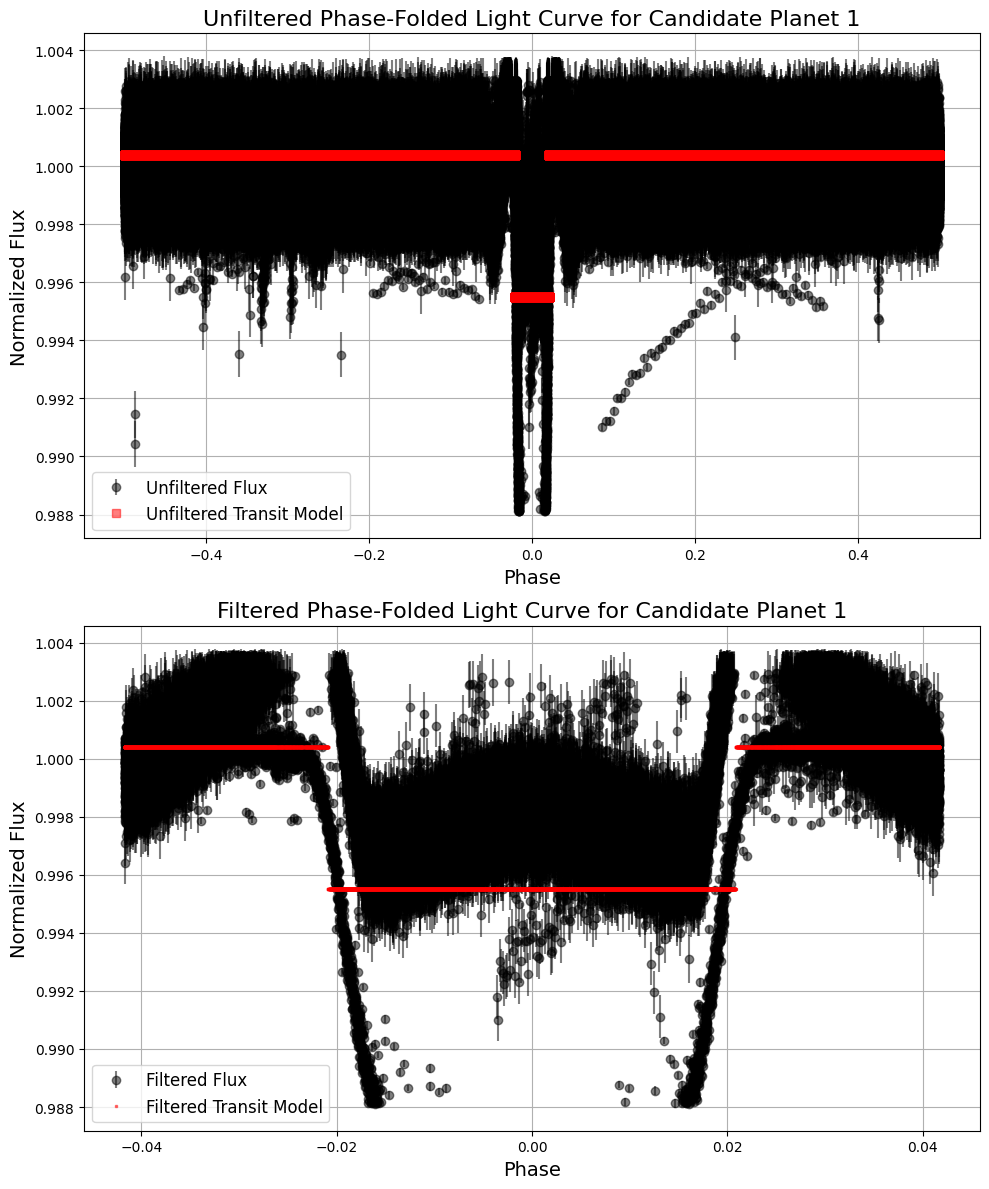

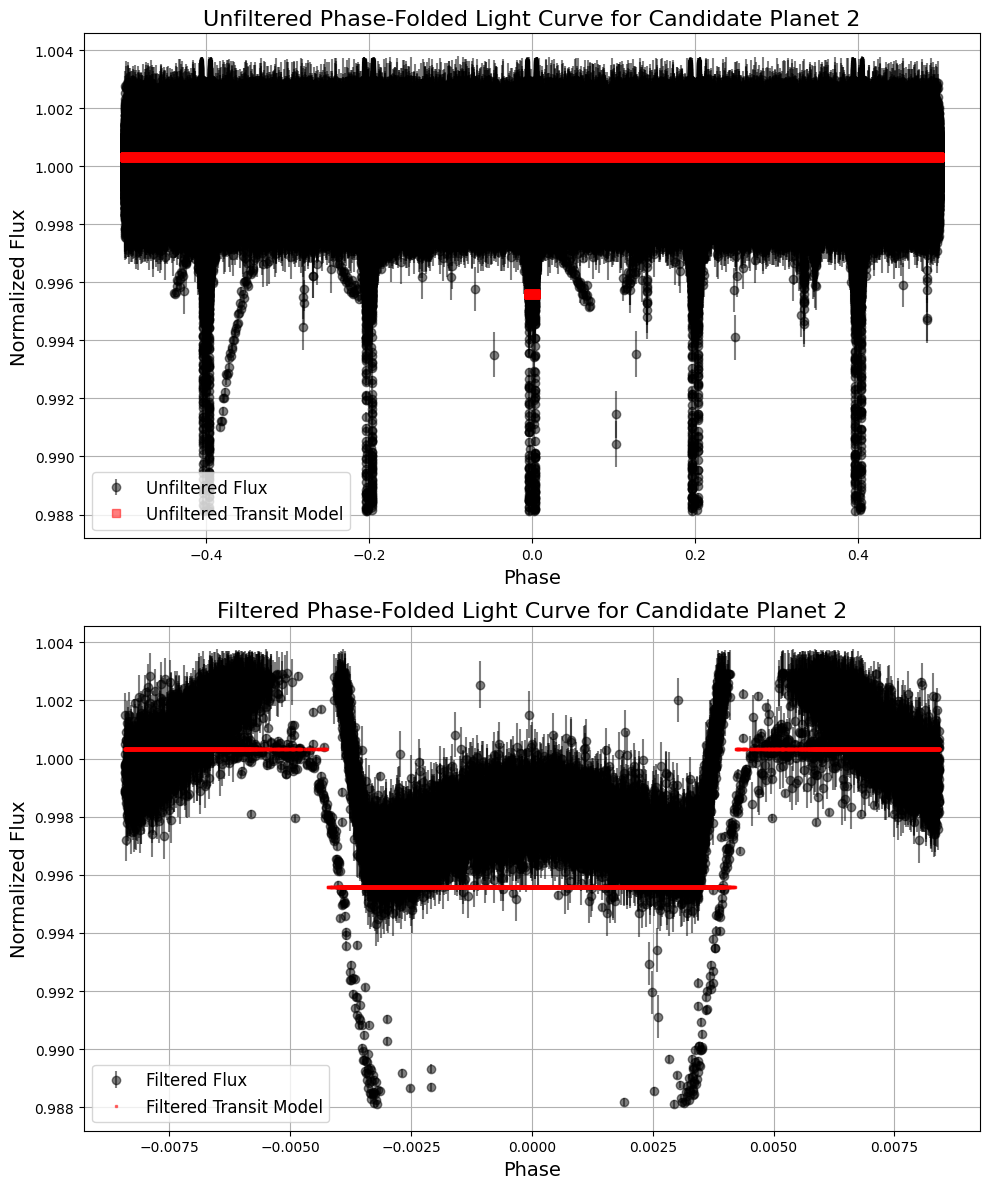

In [17]:
# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)
courseworkb.plot_phase_folded_light_curves(kepler_dataframe,results_list )

In [18]:
courseworkb.summarize_results(results_list,stellar_data)



Detected Planet Candidates:
----------------------------------------
Stellar Radius: 1.415 Solar Radii
Stellar Temperature: 5953 K
----------------------------------------

----------------------------------------
Candidate 1:
  Initial Period = 4.44 days
  Refined Period = 4.44 days
  Transit Depth  = 4.89e-03
  Transit Duration = 0.18 days
  Power = 1507386.41
----------------------------------------
Best Transit Candidate: Period = 4.44 days, Depth = 4.89e-03
Estimated Planet Radius: 0.099 Solar Radii
Estimated Planet Radius: 10.794 Earth Radii
Estimated Planet Radius: 0.985 Jupiter Radii

----------------------------------------
Candidate 2:
  Initial Period = 22.19 days
  Refined Period = 22.19 days
  Transit Depth  = 4.72e-03
  Transit Duration = 0.19 days
  Power = 298435.23
----------------------------------------
Best Transit Candidate: Period = 22.19 days, Depth = 4.72e-03
Estimated Planet Radius: 0.097 Solar Radii
Estimated Planet Radius: 10.608 Earth Radii
Estimated Planet